## Import the data and produce basic descriptive data analysis

Import Statements

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import math
from scipy import stats

Import Dataset

In [ ]:
%%time
# Create your connection.
cnx = sqlite3.connect('FPA_FOD_20170508.sqlite')
df = pd.read_sql_query("SELECT * FROM Fires", cnx)

Dataset Descriptive Statistics

In [3]:
df.shape

(1880465, 39)

In [4]:
df.head().T

,0,1,2,3,4
OBJECTID,1,2,3,4,5
FOD_ID,1,2,3,4,5
FPA_ID,FS-1418826,FS-1418827,FS-1418835,FS-1418845,FS-1418847
SOURCE_SYSTEM_TYPE,FED,FED,FED,FED,FED
SOURCE_SYSTEM,FS-FIRESTAT,FS-FIRESTAT,FS-FIRESTAT,FS-FIRESTAT,FS-FIRESTAT
NWCG_REPORTING_AGENCY,FS,FS,FS,FS,FS
NWCG_REPORTING_UNIT_ID,USCAPNF,USCAENF,USCAENF,USCAENF,USCAENF
NWCG_REPORTING_UNIT_NAME,Plumas National Forest,Eldorado National Forest,Eldorado National Forest,Eldorado National Forest,Eldorado National Forest
SOURCE_REPORTING_UNIT,0511,0503,0503,0503,0503
SOURCE_REPORTING_UNIT_NAME,Plumas National Forest,Eldorado National Forest,Eldorado National Forest,Eldorado National Forest,Eldorado National Forest


In [5]:
df.describe()

,OBJECTID,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_CODE,CONT_DATE,CONT_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,OWNER_CODE
count,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,9.889340e+05,988934.000000,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06
mean,9.402330e+05,5.484020e+07,2.003710e+03,2.453064e+06,1.647191e+02,5.979037e+00,2.453238e+06,172.656766,7.452016e+01,3.678121e+01,-9.570494e+01,1.059658e+01
std,5.428436e+05,1.011963e+08,6.663099e+00,2.434573e+03,9.003891e+01,3.483860e+00,2.687548e+03,84.320348,2.497598e+03,6.139031e+00,1.671694e+01,4.404662e+00
min,1.000000e+00,1.000000e+00,1.992000e+03,2.448622e+06,1.000000e+00,1.000000e+00,2.448622e+06,1.000000,1.000000e-05,1.793972e+01,-1.788026e+02,0.000000e+00
25%,4.701170e+05,5.055000e+05,1.998000e+03,2.451084e+06,8.900000e+01,3.000000e+00,2.450701e+06,102.000000,1.000000e-01,3.281860e+01,-1.103635e+02,8.000000e+00
50%,9.402330e+05,1.067761e+06,2.004000e+03,2.453178e+06,1.640000e+02,5.000000e+00,2.453466e+06,181.000000,1.000000e+00,3.545250e+01,-9.204304e+01,1.400000e+01
75%,1.410349e+06,1.910639e+07,2.009000e+03,2.455036e+06,2.300000e+02,9.000000e+00,2.455754e+06,232.000000,3.300000e+00,4.082720e+01,-8.229760e+01,1.400000e+01
max,1.880465e+06,3.003484e+08,2.015000e+03,2.457388e+06,3.660000e+02,1.300000e+01,2.457392e+06,366.000000,6.069450e+05,7.033060e+01,-6.525694e+01,1.500000e+01


In [6]:
df['STATE'].value_counts().head()

CA    189550
GA    168867
TX    142021
NC    111277
FL     90261
Name: STATE, dtype: int64

In [7]:
df['OWNER_DESCR'].value_counts()

MISSING/NOT SPECIFIED    1050835
PRIVATE                   314822
USFS                      188338
BIA                       106819
STATE OR PRIVATE           71881
BLM                        63278
STATE                      30790
NPS                        17524
FWS                        12191
TRIBAL                      8952
OTHER FEDERAL               6452
MUNICIPAL/LOCAL             4236
UNDEFINED FEDERAL           2206
COUNTY                      1841
BOR                          285
FOREIGN                       15
Name: OWNER_DESCR, dtype: int64

In [8]:
df['SOURCE_REPORTING_UNIT_NAME'].value_counts().head()

Georgia Forestry Commission           97844
Fire Department of New York           75461
South Carolina Forestry Commission    52064
Mississippi Forestry Commission       46396
Texas Forest Service                  42675
Name: SOURCE_REPORTING_UNIT_NAME, dtype: int64

In [9]:
df['STAT_CAUSE_DESCR'].value_counts()

Debris Burning       429028
Miscellaneous        323805
Arson                281455
Lightning            278468
Missing/Undefined    166723
Equipment Use        147612
Campfire              76139
Children              61167
Smoking               52869
Railroad              33455
Powerline             14448
Fireworks             11500
Structure              3796
Name: STAT_CAUSE_DESCR, dtype: int64

In [10]:
%%time
# Create your connection.
cnx = sqlite3.connect('FPA_FOD_20170508.sqlite')
df2 = pd.read_sql_query("SELECT * FROM NWCG_UnitIDActive_20170109", cnx)

Wall time: 125 ms


In [11]:
df2.head().T

,0,1,2,3,4
OBJECTID,1,2,3,4,5
UnitId,USAKCAN,USAKCEKX,USAKCFFX,USAKCFMX,USAKCFQ
GeographicArea,AK,AK,AK,AK,AK
Gacc,USAKACC,USAKACC,USAKACC,USAKACC,USAKACC
WildlandRole,Resource Provider Only,Incident Host Geographic,Incident Host Geographic,Incident Host Geographic,Incident Host Geographic
UnitType,Non-Government,US County/Local,US County/Local,US County/Local,US Federal
Department,NG,AK,AK,AK,DOD
Agency,ANC,C&L,C&L,C&L,USAF
Parent,None,None,None,None,None
Country,US,US,US,US,US


In [12]:
df2.shape

(5867, 13)

In [13]:
df2['GeographicArea'].value_counts().head()

RM    1484
CA    1285
NW     755
SA     633
EA     401
Name: GeographicArea, dtype: int64

In [14]:
df2['WildlandRole'].value_counts().head()

Incident Host Geographic        5228
Dispatch/Coordination Center     328
Resource Provider Only           266
Fire/Radio Cashes                 29
Incident Host Functional           8
Name: WildlandRole, dtype: int64

In [15]:
df2['UnitType'].value_counts().head()

US County/Local    3063
US Federal         1791
US State            692
Interagency         129
Non-Government      123
Name: UnitType, dtype: int64

# Question 1: Wildfire frequency, severity and duration over time

### Question 1a) 
Has the annual frequency of wildfires increased over time? If so, what has been the rate of increase?  Has that increase been accelerating?

In [16]:
US_fires_per_year = pd.DataFrame(df['FIRE_YEAR'].value_counts())
US_fires_per_year.sort_index(inplace=True)
US_fires_per_year

,FIRE_YEAR
1992,67975
1993,61989
1994,75955
1995,71472
1996,75574
1997,61450
1998,68370
1999,89363
2000,96416
2001,86587


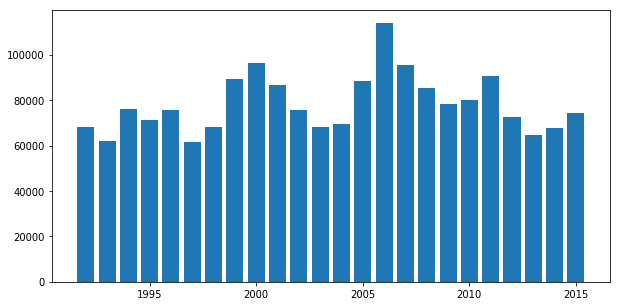

In [17]:
plt.figure(figsize=(10,5))
plt.bar(US_fires_per_year.index, US_fires_per_year['FIRE_YEAR'])
plt.show()

In [18]:
#growth rate
avg_annual_growth = math.pow((US_fires_per_year.loc[2015] / US_fires_per_year.loc[1992]),
                           (1/len(US_fires_per_year))) -1

print("The average annual growth rate in fires between 1994 and 2015 was: \
{p:0.2f}%".format(p=avg_annual_growth*100))

The average annual growth rate in fires between 1994 and 2015 was: 0.38%


In [19]:
slope, intercept, r_value, p_value, std_err = stats.linregress(
    US_fires_per_year.index,US_fires_per_year['FIRE_YEAR'])

print("slope: {s:0.3f}".format(s=slope))
print("r-squared: {r:0.3f}".format(r=r_value))
print("p-value: {p:0.3f}".format(p=p_value))

slope: 343.347
r-squared: 0.190
p-value: 0.373


### Analysis for Q1a)

Surprisingly, the absolute number of wildfires in the U.S. has not shown a significant increase over the past 24 years.  The annualized growth rate is just 0.38% and in fact there is no statistically significant increase over that time frame.  However, there does appear to have been a consistent increase in wildfires between 1992 and 2006 before dropping off again from 2006 through 2015.  

This raises a new question: what was driving the increase between 1992 and 2006 and the subsequent drop-off through 2015?

### Question 1b)
How has the annual frequency of wildfires changed by state?  Are there any locations that stand out as contributors to the rise / fall of wildfires?

In [20]:
US_fires_per_year_by_state = pd.DataFrame(df.groupby([df['STATE'], df['FIRE_YEAR']]).size()).reset_index()
US_fires_per_year_by_state.columns = ['STATE', 'FIRE_YEAR', 'COUNT']
US_fires_per_year_by_state.sample(5)

,STATE,FIRE_YEAR,COUNT
323,ID,2015,1277
357,IN,2001,140
81,AZ,2001,3186
1121,WA,1995,1213
522,MI,1999,150


In [183]:
#top states in 1992, 2015

mask1992 = US_fires_per_year_by_state['FIRE_YEAR'] == 1992
mask2015 = US_fires_per_year_by_state['FIRE_YEAR'] == 2015

states1992 = US_fires_per_year_by_state[mask1992]
states2015 = US_fires_per_year_by_state[mask2015]

print(1992)
print(states1992.sort_values('COUNT', ascending=False).head())
print()
print(2015)
print(states2015.sort_values('COUNT', ascending=False).head())


states1992_2015 = states1992.merge(states2015, on = 'STATE')
    
states1992_2015['GROWTH'] = states1992_2015['COUNT_y'] / states1992_2015['COUNT_x']
states1992_2015['AVG_ANNUAL_GROWTH'] = (states1992_2015['GROWTH']**(1/(2015-1992+1))) -1
states1992_2015.sort_values('AVG_ANNUAL_GROWTH', ascending=False)


1992
    STATE  FIRE_YEAR  COUNT
96     CA       1992  10833
228    GA       1992   6459
635    NC       1992   5696
954    SC       1992   5195
587    MS       1992   4478

2015
     STATE  FIRE_YEAR  COUNT
1049    TX       2015   8304
119     CA       2015   7365
395     KS       2015   5887
826     NY       2015   5884
95      AZ       2015   3819


,STATE,FIRE_YEAR_x,COUNT_x,FIRE_YEAR_y,COUNT_y,GROWTH,AVG_ANNUAL_GROWTH
16,KS,1992,16,2015,5887,367.937500,0.279108
19,MA,1992,7,2015,2170,310.000000,0.270009
12,IA,1992,5,2015,517,103.400000,0.213217
46,VT,1992,1,2015,87,87.000000,0.204518
38,PA,1992,17,2015,807,47.470588,0.174495
35,OH,1992,21,2015,537,25.571429,0.144607
29,NE,1992,25,2015,599,23.960000,0.141507
1,AL,1992,93,2015,2074,22.301075,0.138100
34,NY,1992,364,2015,5884,16.164835,0.122942
17,KY,1992,49,2015,756,15.428571,0.120762


In [65]:
US_fires_per_year_by_state.groupby('STATE').head()

,STATE,FIRE_YEAR,COUNT
0,AK,1992,481
1,AK,1993,861
2,AK,1994,640
3,AK,1995,418
4,AK,1996,718
24,AL,1992,93
25,AL,1993,137
26,AL,1994,3452
27,AL,1995,4230
28,AL,1996,4048


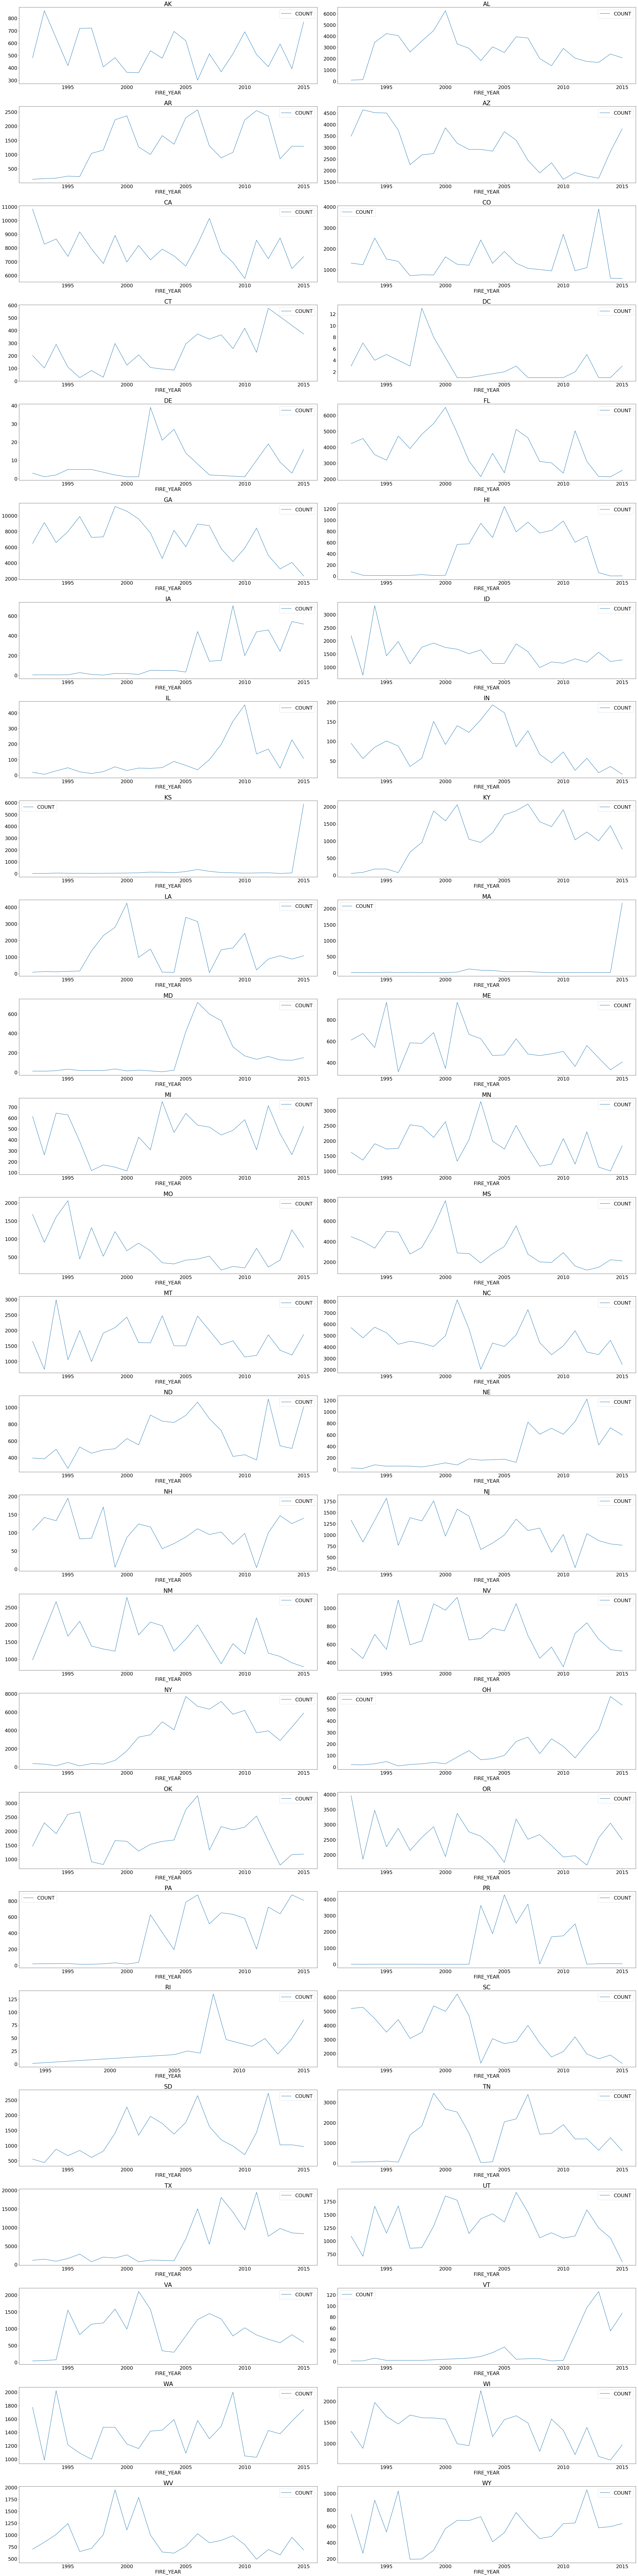

In [179]:
plt.figure(figsize=(40,160))
plt.rcParams.update({'font.size': 22})

# avg_annual_growth_by_state = {}

fire_plots_by_state = US_fires_per_year_by_state.groupby('STATE') #create groupby object
for i, (state, data) in enumerate(fire_plots_by_state):#run through each group and print subplot
#     print(data)
#     print(state)

#     #average growth calcs
    
#     #for some reason grabbing wyoming's numbers for every state
#     ## & state in data['STATE']
#     endyearCount = int(data.loc[(data['FIRE_YEAR'] == data['FIRE_YEAR'].max()) &
#                                 (state == data['STATE']),'COUNT']) 
#     startyearCount = int(data.loc[(data['FIRE_YEAR'] == data['FIRE_YEAR'].min()) &
#                                 (state == data['STATE']),'COUNT'])
#     totalyear = int(data['FIRE_YEAR'].max()) - int(data['FIRE_YEAR'].min())
    
#     print("state: {}, startyear: {}, endyear: {}, totalyear: {}".
#           format(state, startyear, endyear, totalyear))

#     if (totalyear>0):
#         avg_annual_growth_by_state[state] = math.pow((endyear / startyear),(1/totalyear)) -1
    
    #plotting
    ax = plt.subplot(26,2,i+1)
    data.plot(x= 'FIRE_YEAR', y = 'COUNT',ax=ax) 
    ax.set_title(state)

plt.tight_layout()
plt.show()

### Analysis for Question 1b)

Surprisingly, there has been a shift in the states that have the most wildfires.  In 1992, the top 5 states were as follows:

    STATE  FIRE_YEAR  COUNT
96     CA       1992  10833
228    GA       1992   6459
635    NC       1992   5696
954    SC       1992   5195
587    MS       1992   4478

However, in 2015, the counts switched:

     STATE  FIRE_YEAR  COUNT
1049    TX       2015   8304
119     CA       2015   7365
395     KS       2015   5887
826     NY       2015   5884
95      AZ       2015   3819


The states with the greatest increase over the time series were also somewhat unexpected.  Please note that a few states that have high growth rates have been omitted due to small absolute counts relative to the average or suspect data (e.g. Massachusetts and Kansas spiking up unreasonably):

New York saw a 12.23% annual increase from 364 to 5884.
Texas saw a 8.52% increase from 1168 to 8304, exceeding California's wildfire count by about 1000.

Some large states like California actually saw a decrease over time.

California's wildfire count fell -1.60%, while Georgia's saw a -4.11% decline.  Other big contributors saw declines, like North Carolina (-3.42%), South Carolina (-5.61%) and Mississippi (-3.06%).

I believe it would be helpful to plot these drops on a map to see if certain parts of the country are seeing lower fires.

In addition, it would be helpful to understand further why these states are seeing such increases/decreases.

#### Note: maybe want to do first 5 years vs. last 5 years to get rid of low counts?


# Problems to address

getting average annual growth rates by state calculated correctly.  All being attributed to Wyoming